OpenAI Gym: CliffWalkingEnv

In the CliffWalking environment, the agent navigates a 4x12 gridworld. 

    """
    This is a simple implementation of the Gridworld Cliff
    reinforcement learning task.
    Adapted from Example 6.6 from Reinforcement Learning: An Introduction
    by Sutton and Barto:
    http://people.inf.elte.hu/lorincz/Files/RL_2006/SuttonBook.pdf

    With inspiration from:
    https://github.com/dennybritz/reinforcement-learning/blob/master/lib/envs/cliff_walking.py
    The board is a 4x12 matrix, with (using Numpy matrix indexing):
        [3, 0] as the start at bottom-left
        [3, 11] as the goal at bottom-right
        [3, 1..10] as the cliff at bottom-center
    Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward 
    and a reset to the start. An episode terminates when the agent reaches the goal.
    """
    

# TD Prediction: TD(0)

Given a policy pi, determine value function vpi (or action value function qpi).

Average sampled value of sum of the immediate reward.

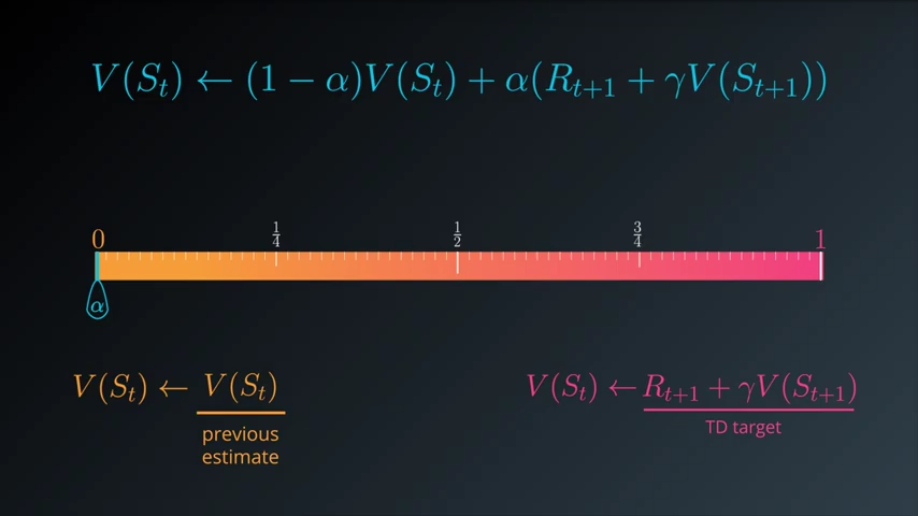

TD(0) is guaranteed to converge to the true state-value function, as long as the step-size parameter α is sufficiently small. If you recall, this was also the case for constant-α MC prediction. However, TD(0) has some nice advantages:

    Whereas MC prediction must wait until the end of an episode to update the value function estimate, TD prediction methods update the value function after every time step. Similarly, TD prediction methods work for continuous and episodic tasks, while MC prediction can only be applied to episodic tasks.
    In practice, TD prediction converges faster than MC prediction. (That said, no one has yet been able to prove this, and it remains an open problem.) You are encouraged to take the time to check this for yourself in your implementations! For an example of how to run this kind of analysis, check out Example 6.2 in the textbook.

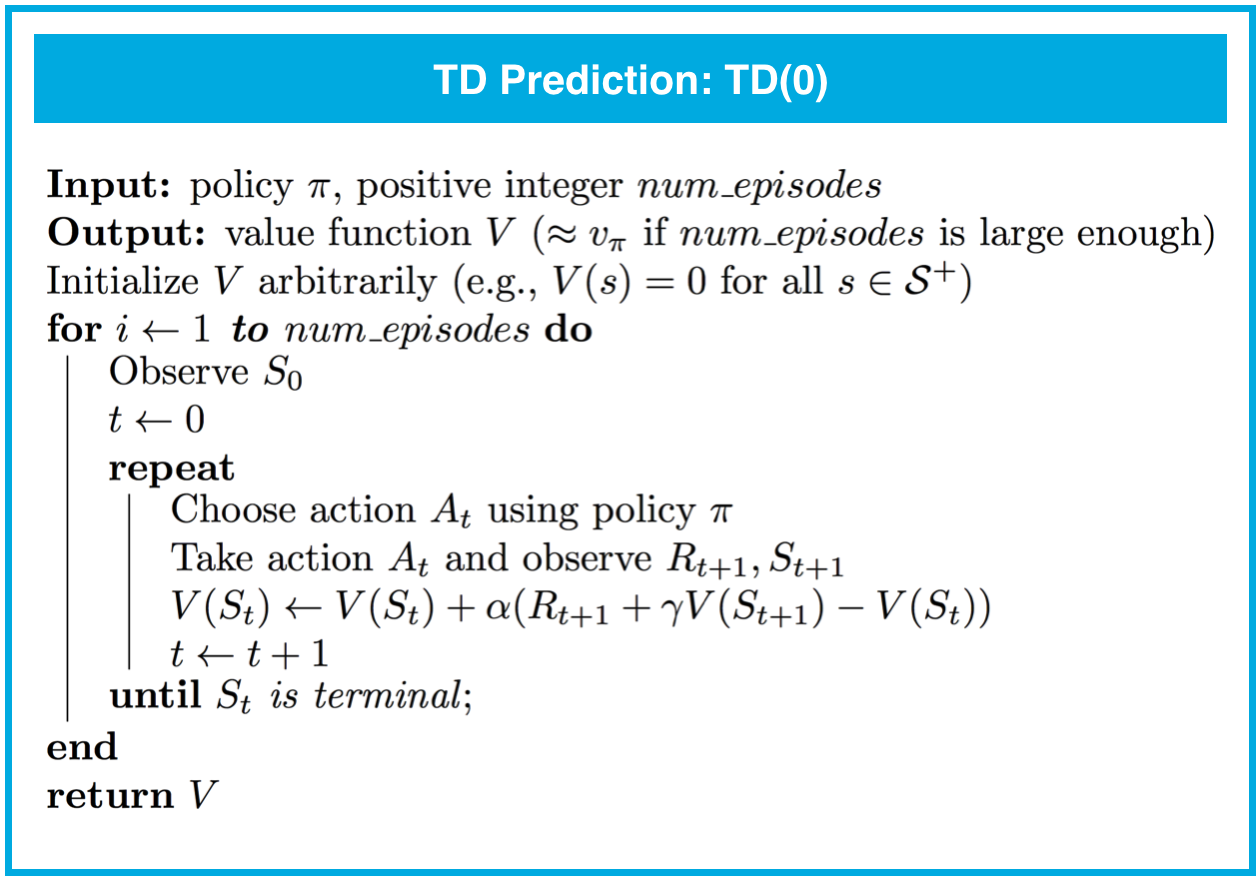


# TD Prediction: Action Values

Flow: S0 A0 R1 S1 -> V(S0, S1) A1 R1 S2 -> V(S1, S2)

Relate values of successive state-action pairs.


# TD Control: Sarsa

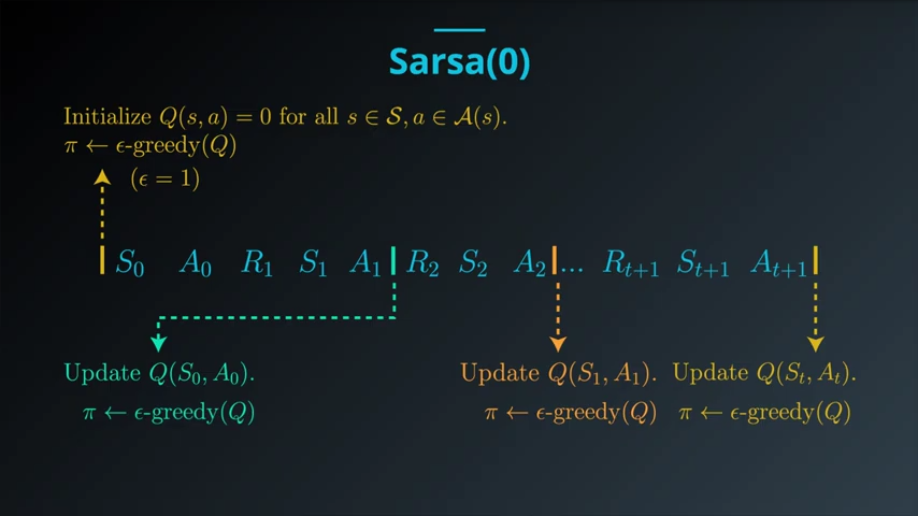

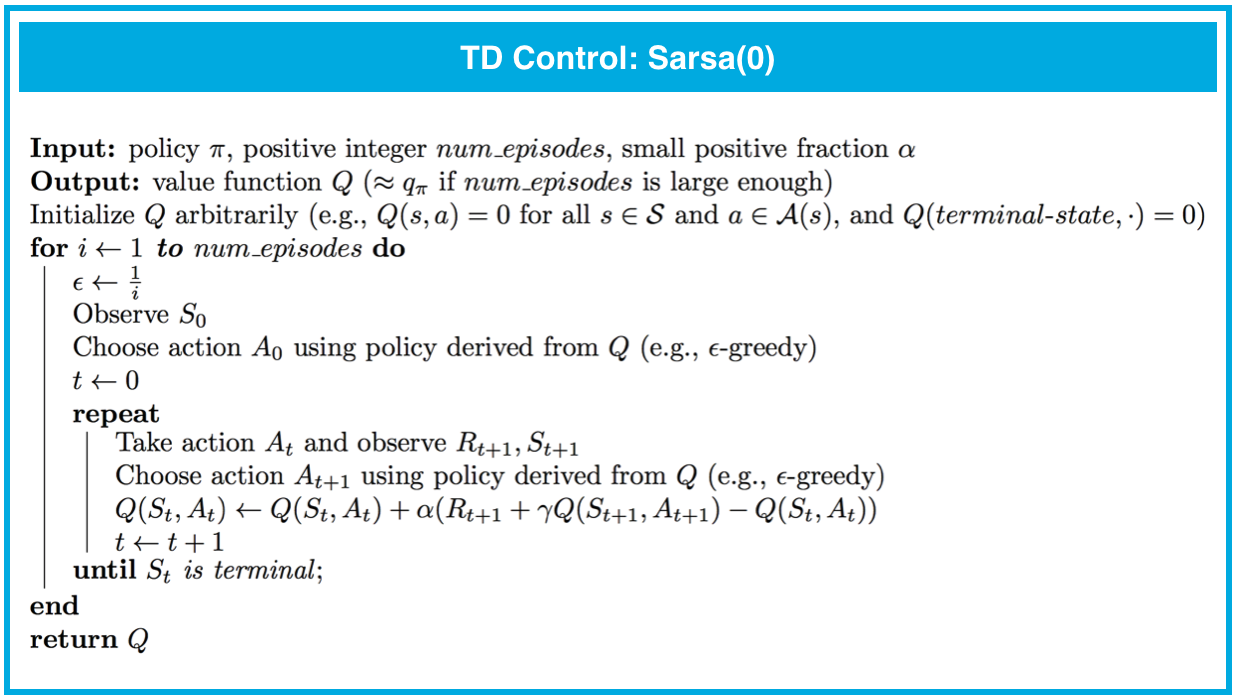

Sarsa(0) is guaranteed to converge to the optimal action-value function, as long as the step-size parameter α\alphaα is sufficiently small, and the Greedy in the Limit with Infinite Exploration (GLIE) conditions are met. The GLIE conditions were introduced in the previous lesson, when we learned about MC control. Although there are many ways to satisfy the GLIE conditions, one method involves gradually decaying the value of ϵ\epsilonϵ when constructing ϵ\epsilonϵ-greedy policies.

In particular, let ϵi\epsilon_iϵi​ correspond to the iii-th time step. Then, if we set ϵi\epsilon_iϵi​ such that:

    ϵi>0\epsilon_i > 0ϵi​>0 for all time steps iii, and
    ϵi\epsilon_iϵi​ decays to zero in the limit as the time step iii approaches infinity (that is, limi→∞ϵi=0\lim_{i\to\infty} \epsilon_i = 0limi→∞​ϵi​=0),

then the algorithm is guaranteed to yield a good estimate for q∗q_*q∗​, as long as we run the algorithm for long enough. A corresponding optimal policy π∗\pi_*π∗​ can then be quickly obtained by setting π∗(s)=argmaxa∈A(s)q∗(s,a)\pi_*(s) = \arg\max_{a\in\mathcal{A}(s)} q_*(s, a)π∗​(s)=argmaxa∈A(s)​q∗​(s,a) for all s∈Ss\in\mathcal{S}s∈S.

## Sarsamax

What action should we use to update to state-action value function?

Take the max over all actions of all possible action state pairs, it chooses the one action that maximises the action value estimate corresponding to the next state.

AKA Q-Learning

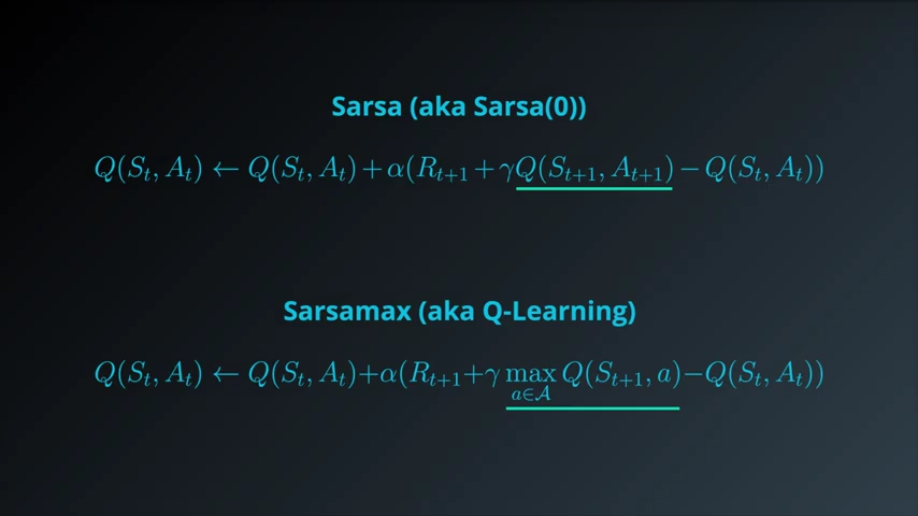

Sarsamax is guaranteed to converge under the same conditions that guarantee convergence of Sarsa.

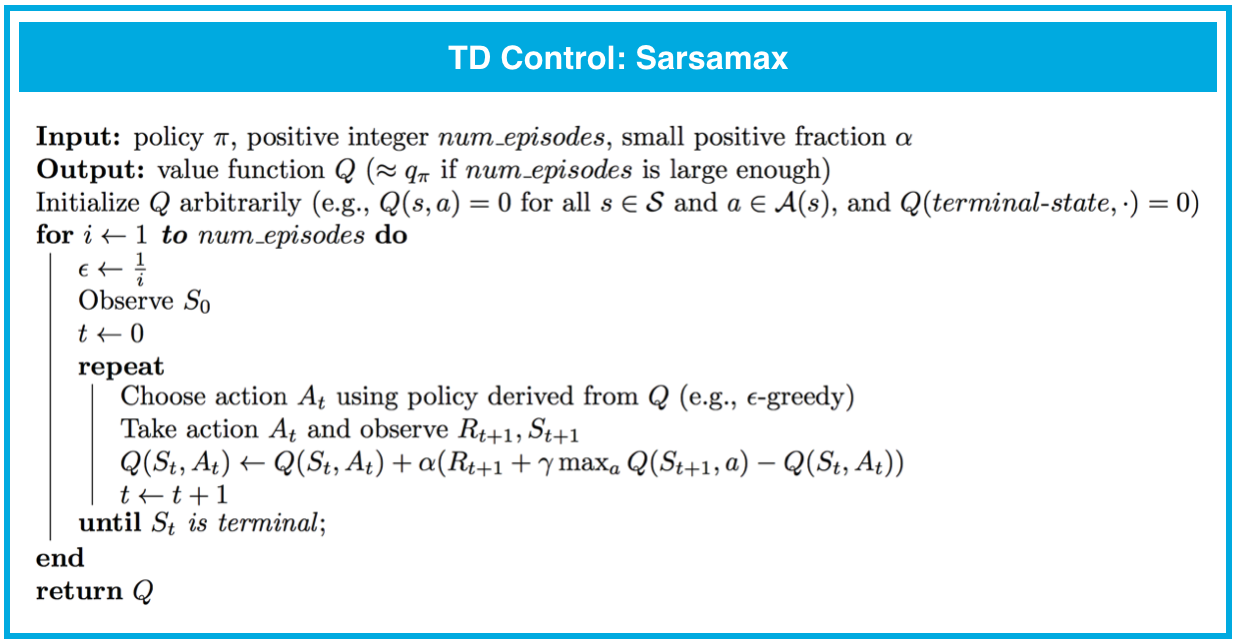


## Expected Sarsa

Uses the expected value of the next state action pair in update step for action value, AKA into account the probability that the agent selects each possible action from the next state.

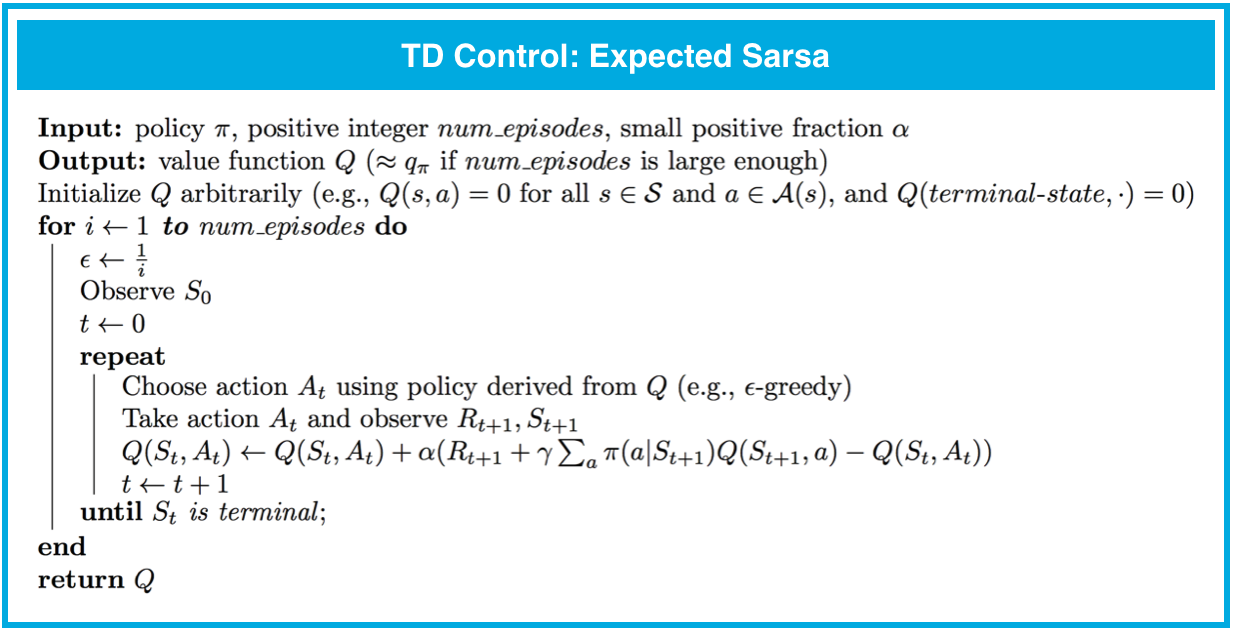

Expected Sarsa is guaranteed to converge under the same conditions that guarantee convergence of Sarsa and Sarsamax.

Remember that theoretically, the as long as the step-size parameter α is sufficiently small, and the Greedy in the Limit with Infinite Exploration (GLIE) conditions are met, the agent is guaranteed to eventually discover the optimal action-value function (and an associated optimal policy). However, in practice, for all of the algorithms we have discussed, it is common to completely ignore these conditions and still discover an optimal policy. You can see an example of this in the solution notebook

# Analyzing Performance

All of the TD control algorithms we have examined (Sarsa, Sarsamax, Expected Sarsa) converge to the optimal action-value function q_*q 
∗
​	  (and so yield the optimal policy \pi_*π 
∗
​	 ) if (1) the value of \epsilonϵ decays in accordance with the GLIE conditions, and (2) the step-size parameter \alphaα is sufficiently small.

The differences between these algorithms are summarized below:

Sarsa and Expected Sarsa are both on-policy TD control algorithms. In this case, the same (\epsilonϵ-greedy) policy that is evaluated and improved is also used to select actions.
Sarsamax is an off-policy method, where the (greedy) policy that is evaluated and improved is different from the (\epsilonϵ-greedy) policy that is used to select actions.
On-policy TD control methods (like Expected Sarsa and Sarsa) have better online performance than off-policy TD control methods (like Sarsamax).
Expected Sarsa generally achieves better performance than Sarsa.

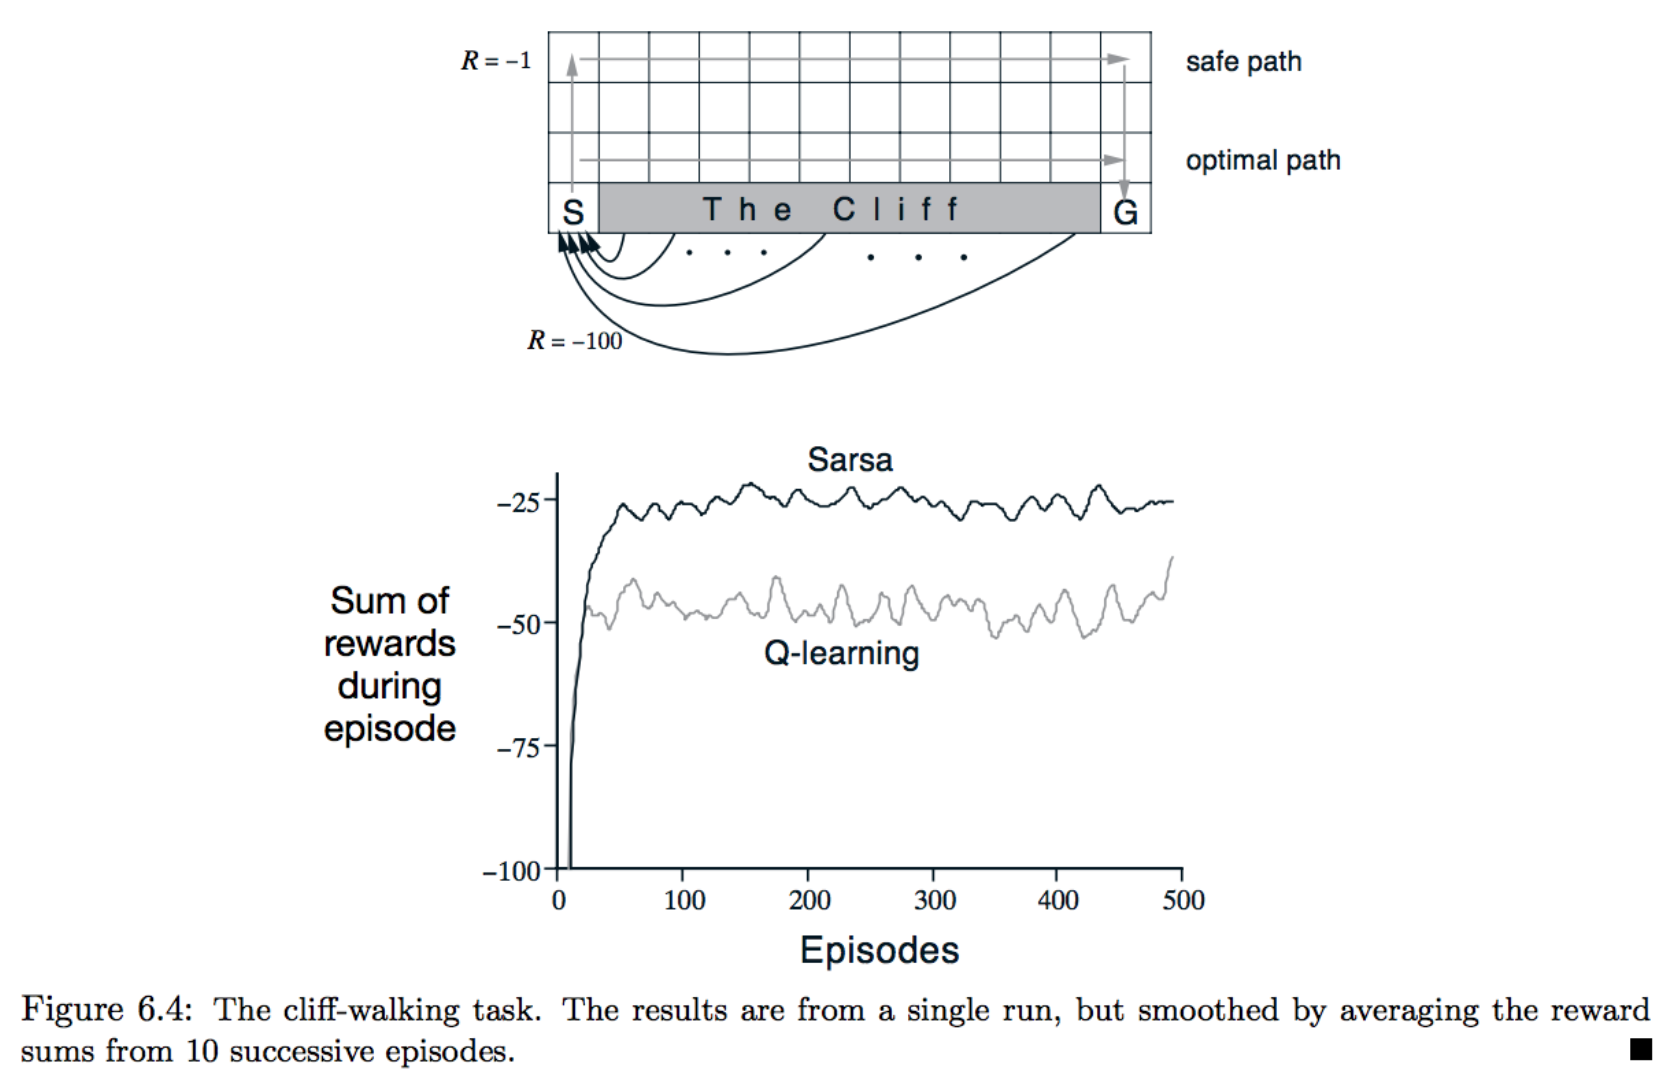



# Summary

## TD Prediction: TD(0)

Whereas Monte Carlo (MC) prediction methods must wait until the end of an episode to update the value function estimate, temporal-difference (TD) methods update the value function after every time step.

For any fixed policy, one-step TD (or TD(0)) is guaranteed to converge to the true state-value function, as long as the step-size parameter α is sufficiently small.

In practice, TD prediction converges faster than MC prediction.

## TD Prediction: Action Values

(In this concept, we discussed a TD prediction algorithm for estimating action values. Similar to TD(0), this algorithm is guaranteed to converge to the true action-value function, as long as the step-size parameter α is sufficiently small.)

## On vs. Off Policy

https://stats.stackexchange.com/questions/184657/what-is-the-difference-between-off-policy-and-on-policy-learning#184794

"An off-policy learner learns the value of the optimal policy independently of the agent's actions. Q-learning is an off-policy learner. An on-policy learner learns the value of the policy being carried out by the agent including the exploration steps."

First of all, there's no reason that an agent has to do the greedy action; Agents can explore or they can follow options. This is not what separates on-policy from off-policy learning.

The reason that Q-learning is off-policy is that it updates its Q-values using the Q-value of the next state s′ and the greedy action a′. In other words, it estimates the return (total discounted future reward) for state-action pairs assuming a greedy policy were followed despite the fact that it's not following a greedy policy.

The reason that SARSA is on-policy is that it updates its Q-values using the Q-value of the next state s′ and the current policy's action a′′. It estimates the return for state-action pairs assuming the current policy continues to be followed.

The distinction disappears if the current policy is a greedy policy. However, such an agent would not be good since it never explores.

On-policy methods estimate the value of a policy while using it for control.

In off-policy methods, the policy used to generate behaviour, called the behaviour policy, may be unrelated to the policy that is evaluated and improved, called the estimation policy.

An advantage of this seperation is that the estimation policy may be deterministic (e.g. greedy), while the behaviour policy can continue to sample all possible actions.

## TD Control: Sarsa(0)

Sarsa(0) (or Sarsa) is an on-policy TD control method. It is guaranteed to converge to the optimal action-value function q∗, as long as the step-size parameter α is sufficiently small and ϵ\epsilonϵ is chosen to satisfy the Greedy in the Limit with Infinite Exploration (GLIE) conditions.

## TD Control: Sarsamax

Sarsamax (or Q-Learning) is an off-policy TD control method. It is guaranteed to converge to the optimal action value function q∗, under the same conditions that guarantee convergence of the Sarsa control algorithm.

## TD Control: Expected Sarsa

Expected Sarsa is an on-policy TD control method. It is guaranteed to converge to the optimal action value function q∗, under the same conditions that guarantee convergence of Sarsa and Sarsamax.

## Analyzing Performance

* On-policy TD control methods (like Expected Sarsa and Sarsa) have better online performance than off-policy TD control methods (like Q-learning).
* Expected Sarsa generally achieves better performance than Sarsa.

